In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import random

class Plotter:
    def __init__(self, dataPoints):
        self.ourDataPoints = dataPoints
    
    # 1a
    # basic plotting function for our data - lets get it down and plotted
    def plot(self, title, axis1, axis2):
        dataPoints = self.ourDataPoints
        newfigure, newaxes = plt.subplots()
        newaxes.scatter(dataPoints[:, 2].astype(float), dataPoints[:, 3].astype(float), s=10, color=dataPoints[:, 4], label="Data Points")
        newaxes.set_title(title)
        newaxes.set_xlabel(axis1)
        newaxes.set_ylabel(axis2)
        newaxes.legend()
        return newaxes
    
    # 1c 2b 3b 3c 
    # plot the line over our data
    def plotOverData(self, weightsArr, plotAxes=None, colors=['green'], labels=["Decision Boundary"], title="Data", provideLabel=True):
        if plotAxes == None:
            plotAxes = self.plot(title, "length", "width")
            
        xtoxDomain = plotAxes.get_xlim()
        domain = np.linspace(xtoxDomain[0], xtoxDomain[1])
        
        for weights, color, label in zip(weightsArr, colors, labels):
            b, w1, w2 = weights[0], weights[1], weights[2]
            x2 = (-((w1 * domain) + b))/w2
            if provideLabel:
                plotAxes.plot(domain, x2, color=color, label=label)
            else:
                plotAxes.plot(domain, x2, color=color)
        
        plotAxes.legend()
        plt.show()

    # 1d
    # plot the 3D surface these weights create
    def plotSurface(self, weights, sigmoid):
        x1 = np.linspace(-50, 50)
        x2 = np.linspace(-50, 50)
        
        x1, x2 = np.meshgrid(x1, x2)
        
        b, w1, w2 = weights[0], weights[1], weights[2]
        # y = (w1 * x1) + (w2 * x2) + b
        # so we then set y = 0 for the plane
        # --> b + (w2 x2) + (w1 x1) = 0 --> (-b + (w1 x1))/w2 = x2
        x2Relation = sigmoid((-b + (w1 * x1))/w2)
        
        figure, axes = plt.subplots(subplot_kw={"projection":"3d"})
        axes.plot_surface(x1, x2, x2Relation, cmap="Wistia")
        
        plt.show()
    
    # 3b 3c
    def plotCurveOverIters(self, toplot):
        toplot = np.array(toplot)
        plt.plot(toplot, color="blue", label="Objective Function (MSE)")
        plt.title("Objective Function (MSE) over Iterations of Gradient Descent")
        plt.xlabel("Iterations on Gradient Descent")
        plt.ylabel("MSE Value")
        plt.show()

class singleLayerNeuralNetwork:
    def __init__(self, data):
        # next we define constants for configuring the one layer network - these will help in calculations later on
        self.OUTPUT_COUNT = 1
        self.INPUT_COUNT = len(data)
        self.INPUT_DIMENSIONS = len(data[0])
        
        # Init the weights as size m x n+1 --> one extra column is provided to make the bias term
        weightSizes = (self.INPUT_DIMENSIONS + 1, self.OUTPUT_COUNT)
        self.W = np.ones(weightSizes)

    def setWeights(self, W0, W1, W2):
        self.W[0], self.W[1], self.W[2] = W0, W1, W2
    
    def getWeights(self):
        return self.W

    # Helps 1b actually format input correctly for later computations
    def formatInput(self, Xdefault):
        # our data inputs should have a bias option - so add a 1 to the columns
        onesArr = np.array([[1]*len(Xdefault[0])])
        X = np.vstack((onesArr, Xdefault))
        return X

    # 1b
    # sigmoid function - just applies sigmoid to an np array
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # 1b
    # single layer neural network function - applies the sigmoid to (W^T) * X matrix multiplication
    def singleLayerNonLinear(self, X):
        W = self.W
        Y = np.matmul(W.T, X)
        linearY = self.sigmoid(Y)
        return linearY

    # 2a
    # This calculates mean squared error for a particular Y
    def meanSquaredError(self, X, C):
        y = self.singleLayerNonLinear(X)
        mse = 0
        for yj, cj in zip(y[0], C):
            mse += pow((yj - cj), 2)
        mse /= len(y[0])
        return 0.5 * mse
    
    # 2d
    def gradient(self, X, C):
        N = len(X[0])
        Y = self.singleLayerNonLinear(X)[0]
        dedw = 0
        for yn, cn, xn in zip(Y, C, X.T):
            dedw += (yn - cn) * (yn) * (1 - yn) * xn
        return dedw/N

    # 2d
    def summedGradient(self, X, C):
        return self.gradient(X, C) * len(X[0])
    
    # 3a 3b 3c 3d
    def gradientDescent(self, X, C, iters=100, epsilon=0.01, stoppingCriteria=None):
        Wstorage = []
        objectiveFunctions = []
        for iter in range(iters):
            if stoppingCriteria and callable(stoppingCriteria) and stoppingCriteria():
                # if stoppingCriteria(): 
                break
            gradientVector = self.gradient(X, C)
            for i, gradient in enumerate(gradientVector):
                self.W[i] -= epsilon * gradient
            Wstorage.append(self.W.copy())
            objectiveFunctions.append(self.meanSquaredError(X, C))
        return (Wstorage, objectiveFunctions)
        

Part 1
-----------------


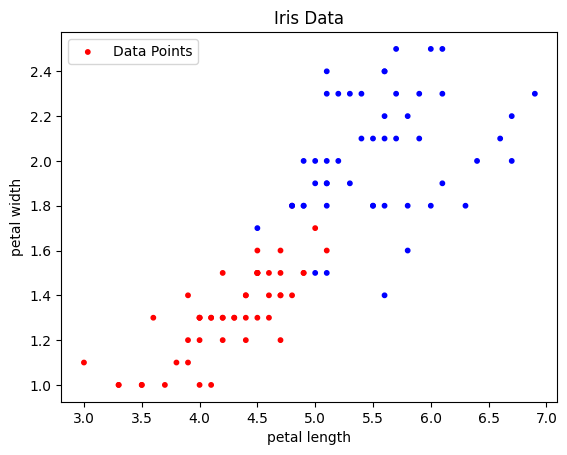

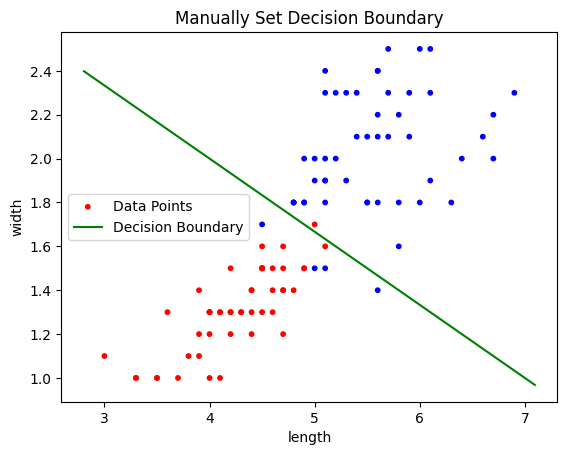

End Part 1-----------------


Part 2
-----------------


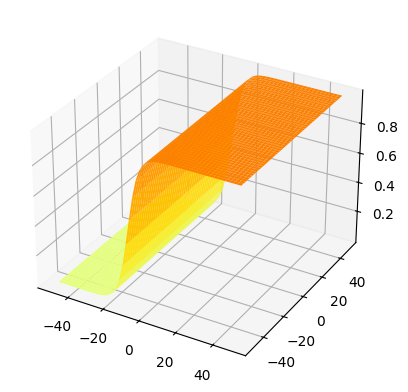

PART 2 A
MSE good weights == 0.0310042457725865
MSE bad weights == 0.24999999230412479


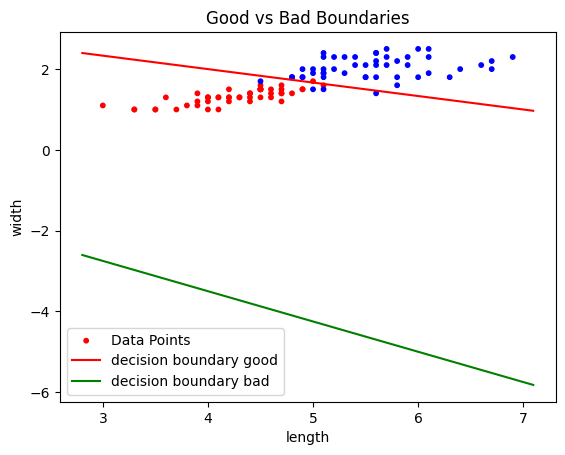

PART 2 D
how decision boundary changes for a small step (three steps demonstrated)


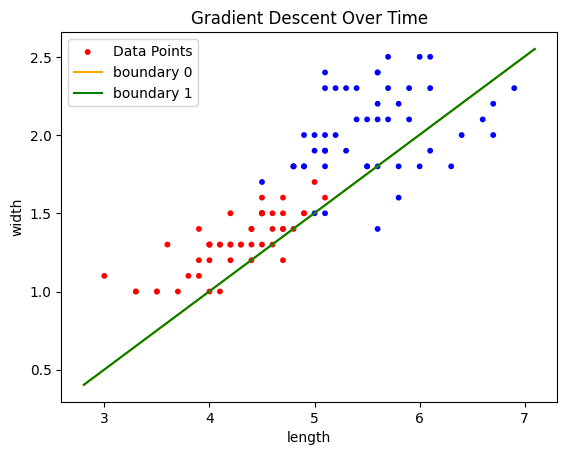

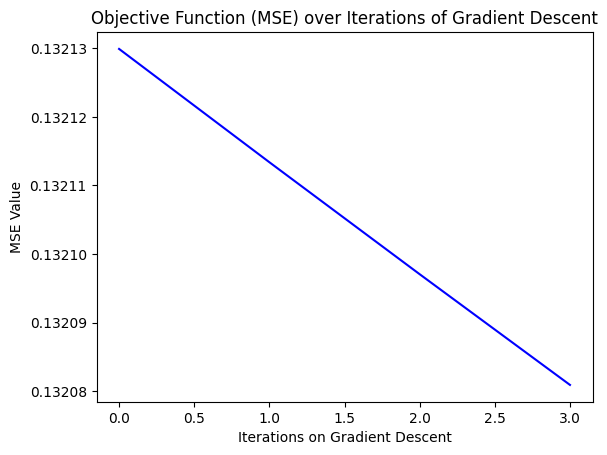

End Part 2-----------------


Part 3
-----------------
PART 3C (tests parts A and B)
For iters = 5596 and randomizedWeights = [4, -4, 2]


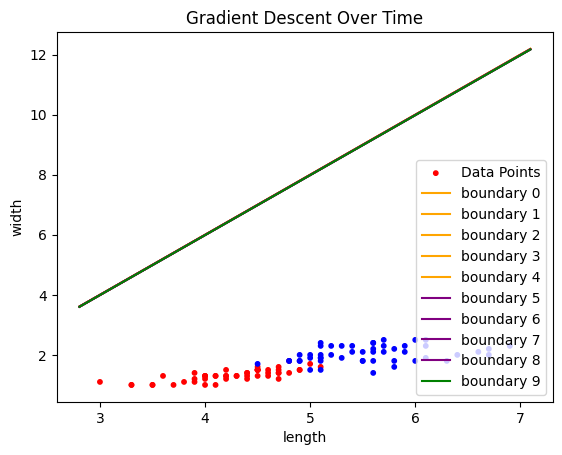

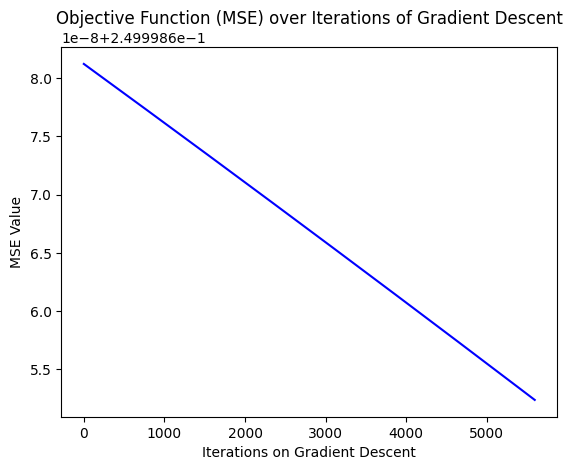

For iters = 6609 and randomizedWeights = [3, -4, 1]


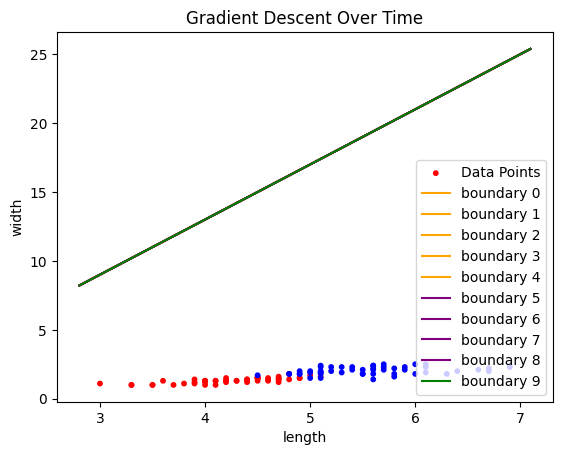

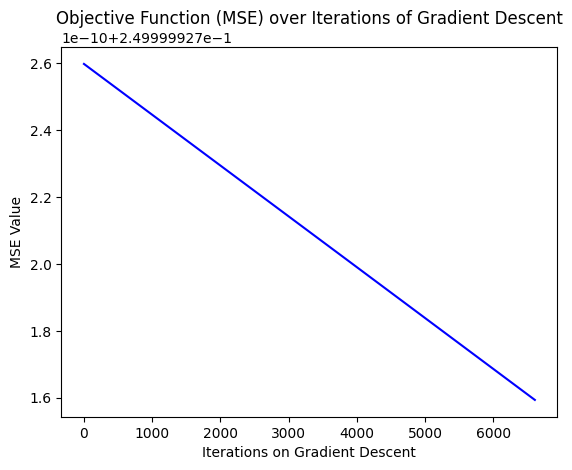

For iters = 7182 and randomizedWeights = [1, -1, 4]


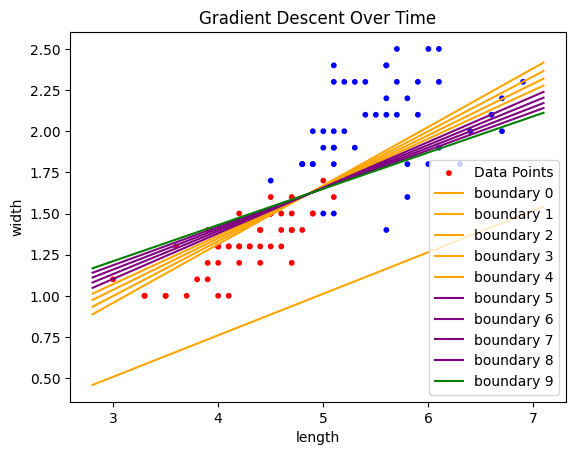

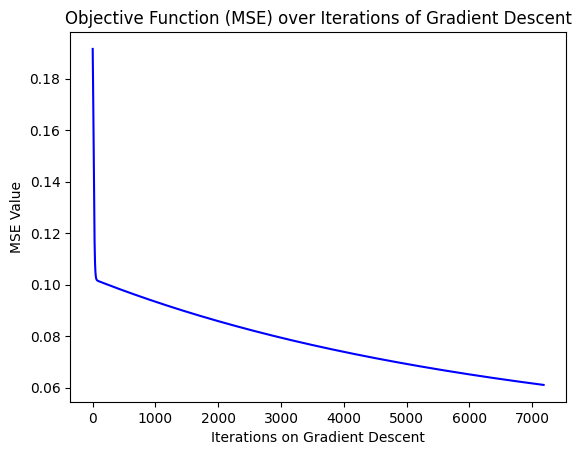

For iters = 6078 and randomizedWeights = [1, -2, 3]


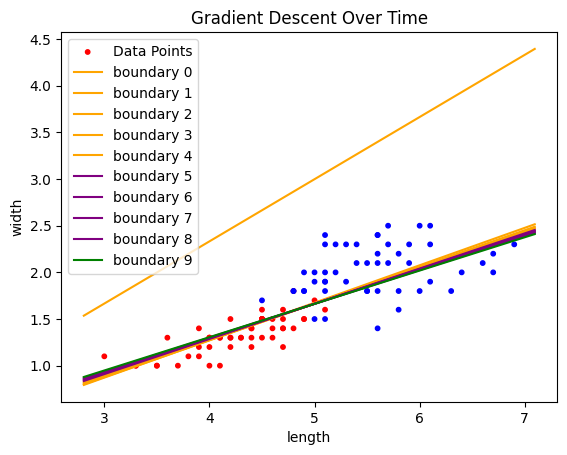

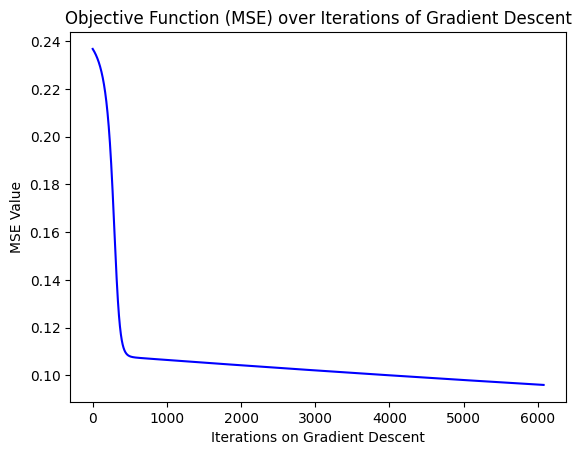

For iters = 5940 and randomizedWeights = [3, -2, 2]


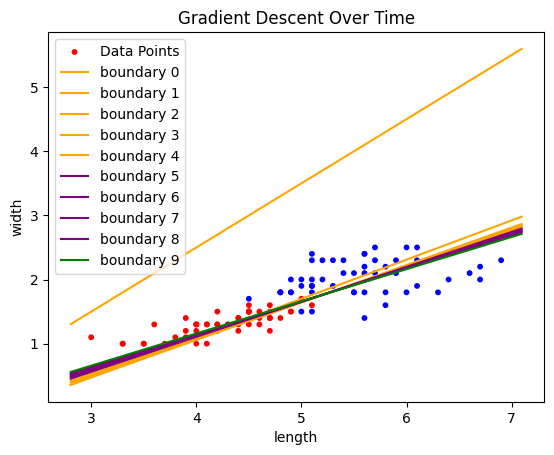

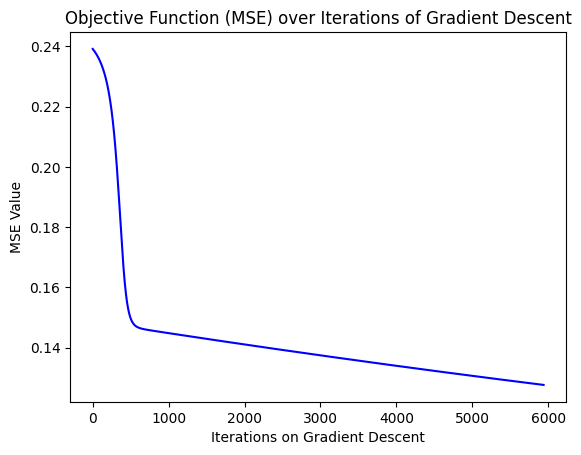

PART 3 D


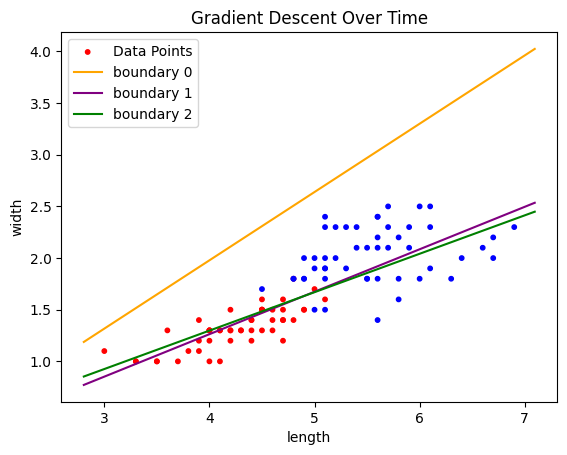

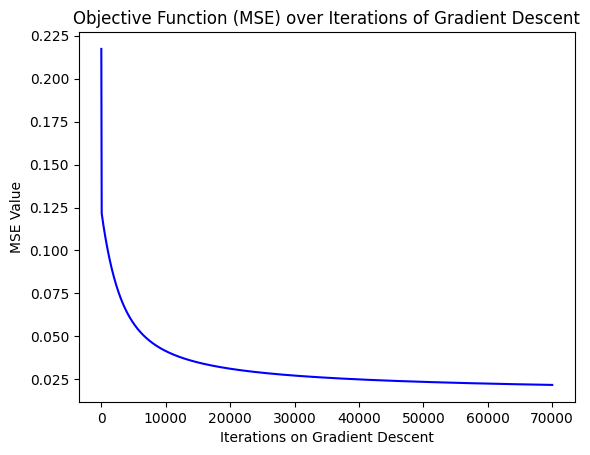

In [ ]:
# extract the data
data = []
with open('irisdata.csv', mode = 'r') as csvFile:
    dataset = csv.reader(csvFile)
    next(dataset, None) # skip lines at top describing csv
    for dataPoint in dataset:
        try:
            if dataPoint[4] != "setosa":
                data.append([float(value) for value in dataPoint[:4]] + ["blue" if dataPoint[4] == "virginica" else "red"])
        except:
            print("failed to get data from dataPoint " + str(dataPoint))
            continue

dataPoints = np.array(data)

print("Part 1\n-----------------")
# actually plot the data
p = Plotter(dataPoints)
p.plot("Iris Data", "petal length", "petal width")
grabbedPlotAxes = plt.gca()

# first we just want to make sure our data points are in float form
data = dataPoints[:, 2:4].astype(float)

# init our network
nn = singleLayerNeuralNetwork(data)

# now create our data inputs, transposing the data so that it is in [column, column,...] form
Xdefault = data.T
X = nn.formatInput(Xdefault)

# modify our weights (this is something I experimented with until I found something that seemed to work)
nn.setWeights(-10, 1, 3)

# and find our y output
y_output = nn.singleLayerNonLinear(X)

# uncomment if you want to figure out which bit of data maps to which certainty: lines below are for if you want to see the Y_output relative to the data (each point is in order of classifications of y)- I just commented them out because this throws a whole lot into the cell output that isn't really needed for anything other than an explanation in the pdf report.
# print("Y = " + str(y_output[0])) # print the output
# print("X = " + str(dataPoints)) # print the data

# plot the result over our y output
p.plotOverData([nn.getWeights()], title="Manually Set Decision Boundary")
print("End Part 1-----------------\n\n")

print("Part 2\n-----------------")
# for the purposes of referencing the weights without repeated calls, lets get them here
W = nn.getWeights().copy()

# now use the simple 3d plotter function for the resulting plane
p.plotSurface(W, nn.sigmoid)

# but now we need to figure out how to grab the appropriate class data
# because we know class2 is 'blue', and class3 is 'red' - and we use 0 for class2, 1 for class3
# we generate C as below
C = []
for dataPt in dataPoints[:, 4].astype(str):
    if dataPt == "red":
        C.append(0)
    else:
        C.append(1)
        
print("PART 2 A")
print("MSE good weights == " + str(nn.meanSquaredError(X, C)))

nn.setWeights(2, 3, 4)
Wbad = nn.getWeights()
nn.singleLayerNonLinear(X)
print("MSE bad weights == " + str(nn.meanSquaredError(X, C)))
p.plotOverData([W, Wbad], plotAxes=None, colors=['red', 'green'], labels=["decision boundary good", "decision boundary bad"], title="Good vs Bad Boundaries")

# 3b 3c 3d
def plotGradientDescent(X, C, Winitial, neuralNet, plotter, iters, stoppingCondition, arbitraryStepSize=0.05, graphEveryOther=200):
    neuralNet.setWeights(Winitial[0], Winitial[1], Winitial[2])
    Wstored, objectiveFunctions = neuralNet.gradientDescent(
        X=X, 
        C=C, 
        iters=iters, 
        epsilon=arbitraryStepSize, 
        stoppingCriteria=stoppingCondition
    )
    WEveryOther = [weights for weights in Wstored[::graphEveryOther]]
    plotter.plotOverData(
        WEveryOther, 
        plotAxes=None, 
        colors=(['orange'] * (len(WEveryOther)//2) + ['purple'] * (len(WEveryOther)//2 - 1) + ['green']),
        labels=["boundary " + str(i) for i in range(len(WEveryOther))], 
        title="Gradient Descent Over Time", 
        provideLabel=True
    )
    plotter.plotCurveOverIters(objectiveFunctions) 
    
random.seed(100)
    

print("PART 2 D")
print("how decision boundary changes for a small step (three steps demonstrated)")
plotGradientDescent(X, C, [2, -1, 2], nn, p, 4, None, 0.005, 2)

print("End Part 2-----------------\n\n")

print("Part 3\n-----------------")
# small helper to get ourselves some randomized weights
def randomizedWeights(lowerBound, upperBound):
    return [random.randint(lowerBound, upperBound), -1 * random.randint(lowerBound, upperBound), random.randint(lowerBound, upperBound)]

print("PART 3C (tests parts A and B)")
stoppingConditions = [
    nn.meanSquaredError(X, C) < 0.2,
    nn.meanSquaredError(X, C) < 0.2,
    nn.meanSquaredError(X, C) < 0.2,
    nn.meanSquaredError(X, C) < 0.05,
    None
]
stepSizes = [0.1] * 2 + [0.05] + [0.01]*2
for i in range(5):
    iterations = random.randint(5000, 7500)
    rWeights = randomizedWeights(1, 4)
    print("For iters = " + str(iterations) + " and randomizedWeights = " + str(rWeights))
    plotGradientDescent(X, C, rWeights, nn, p, iterations, stoppingCondition=stoppingConditions[i], graphEveryOther=int(iterations/10), arbitraryStepSize=stepSizes[i])


print("PART 3 D")
setNN = randomizedWeights(1, 4)
# nn.setWeights(-0.5 * setNN[0], 0.8 * setNN[1], 2 + setNN[2])
nn.setWeights(setNN[0], 0.5 * setNN[1], setNN[2])
currMSE = nn.meanSquaredError(X, C)
Wstored, objectiveFunctions = nn.gradientDescent(
    X=X, 
    C=C, 
    iters=70000, 
    epsilon=0.1, 
    stoppingCriteria=None,
)

WEveryOther = [Wstored[0]]
for idx, mse in enumerate(objectiveFunctions):
    if mse <= 0.5 * currMSE and len(WEveryOther) == 1:
        WEveryOther.append(Wstored[idx])
    elif mse <= 0.1 or idx == len(objectiveFunctions) - 1:
        WEveryOther.append(Wstored[idx])
        break

p.plotOverData(
    WEveryOther, 
    plotAxes=None, 
    colors=(['orange'] + ['purple'] + ['green']),
    labels=["boundary " + str(i) for i in range(len(WEveryOther))], 
    title="Gradient Descent Over Time", 
    provideLabel=True
)
p.plotCurveOverIters(objectiveFunctions) 